# Fraud detection in gas and electricity

## Import data

In [7]:
# import all modules needed
import models.eda as eda
#from models.eda import boxplot

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import datetime

import warnings
warnings.filterwarnings('ignore')

In [8]:
# df_client and df_invoice are being loaded from the data folder
df_client = eda.load_data("data/train/client_train.csv")
df_invoice = eda.load_data("data/train/invoice_train.csv")

# df_client and df_invoice are being merged on the client_id column
df_merged = pd.merge(df_client, df_invoice, on="client_id", how="left")

# df_data is a copy of df_merged
df_data = df_merged.copy()

In [9]:
# displaying the shape of the merged dataframe
df_data.shape # 4476749 rows × 14 columns

# displaying all columns
pd.set_option('display.max_columns', None)

## Data Cleaning

In [10]:
# change the date format to datetime to standard format
df_data['creation_date'] = pd.to_datetime(df_data['creation_date'], format='%d/%m/%Y')
df_data['invoice_date'] = pd.to_datetime(df_data['invoice_date'], format='%Y/%m/%d')

# Converting the client_id column to binary format
df_data['client_id'] = df_data['client_id'].astype('category').cat.codes
# convert the target column to binary format
df_data['target'] = df_data['target'].astype('category').cat.codes
#convert the counter_statue column to a binary format
df_data['counter_statue'] = df_data['counter_statue'].astype('category').cat.codes

# change column name disrict to district
df_data.rename(columns={'disrict': 'district'}, inplace=True)
#change colunm name consommation_level_1 to consumption_level_1
df_data.rename(columns={'consommation_level_1': 'consumption_level_1'}, inplace=True)
#change colunm name consommation_level_2 to consumption_level_2
df_data.rename(columns={'consommation_level_2': 'consumption_level_2'}, inplace=True)
#change colunm name consommation_level_3 to consumption_level_3
df_data.rename(columns={'consommation_level_3': 'consumption_level_3'}, inplace=True)
#change colunm name consommation_level_4 to consumption_level_4
df_data.rename(columns={'consommation_level_4': 'consumption_level_4'}, inplace=True)

In [11]:
# check for missing values
df_data.isnull().sum() # 0 missing values

# check for duplicates
df_data.duplicated().sum() # 11 duplicates
# since we have over 4476749 rows, we can drop 11 duplicates
df_data.drop_duplicates(inplace=True)
# check for duplicates again
df_data.duplicated().sum() # 0 duplicates

# check for NaN values
df_data.isna().sum() # 0 NaN values

df_data.head()

df_data.dtypes

district                        int64
client_id                       int32
client_catg                     int64
region                          int64
creation_date          datetime64[ns]
target                           int8
invoice_date           datetime64[ns]
tarif_type                      int64
counter_number                  int64
counter_statue                   int8
counter_code                    int64
reading_remarque                int64
counter_coefficient             int64
consumption_level_1             int64
consumption_level_2             int64
consumption_level_3             int64
consumption_level_4             int64
old_index                       int64
new_index                       int64
months_number                   int64
counter_type                   object
dtype: object

In [41]:
# show how many target 0 and 1 is in the column target
df_data['target'].value_counts()


0    4123629
1     353109
Name: target, dtype: int64

## EDA

In [12]:
df_data.head()


,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,counter_type
0,60,0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [13]:
# create a table for client_id 0 and sort by invoice_date which is the date the invoice was created
df_data[df_data['client_id'] == 0].sort_values(by=['invoice_date'], ascending=True)

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,counter_type
22,60,0,11,101,1994-12-31,0,2005-10-17,11,1335667,0,203,6,1,124,0,0,0,3685,3809,4,ELEC
23,60,0,11,101,1994-12-31,0,2006-02-24,11,1335667,0,203,6,1,141,0,0,0,3809,3950,4,ELEC
24,60,0,11,101,1994-12-31,0,2006-06-23,11,1335667,0,203,6,1,162,0,0,0,3950,4112,4,ELEC
25,60,0,11,101,1994-12-31,0,2006-10-18,11,1335667,0,203,6,1,159,0,0,0,4112,4271,4,ELEC
28,60,0,11,101,1994-12-31,0,2007-02-26,11,1335667,0,203,6,1,182,0,0,0,4271,4453,4,ELEC
26,60,0,11,101,1994-12-31,0,2007-06-27,11,1335667,0,203,6,1,240,0,0,0,4453,4693,4,ELEC
27,60,0,11,101,1994-12-31,0,2007-10-25,11,1335667,0,203,6,1,276,0,0,0,4693,4969,4,ELEC
34,60,0,11,101,1994-12-31,0,2008-01-04,11,1335667,0,203,6,1,277,0,0,0,4969,5246,4,ELEC
29,60,0,11,101,1994-12-31,0,2008-07-28,11,1335667,0,203,6,1,171,0,0,0,5246,5417,4,ELEC
10,60,0,11,101,1994-12-31,0,2008-11-25,11,1335667,0,203,6,1,174,0,0,0,5417,5591,4,ELEC


In [14]:
# list 10 unique client_id values with target = 1
df_data[df_data['target'] == 1]['client_id'].unique()[:10]

array([ 41,  46,  97, 106, 126, 152, 201, 245, 249, 266], dtype=int32)

In [15]:
pd.set_option('display.max_rows', None)
# create a table for client_id 1 and sort by invoice_date which is the date the invoice was created
df_data[df_data['client_id'] == 245].sort_values(by=['invoice_date'], ascending=True)

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number,counter_type
7605,63,245,11,311,1992-11-24,1,2006-03-11,11,1170937,0,203,6,1,67,0,0,0,308,375,4,ELEC
7604,63,245,11,311,1992-11-24,1,2006-06-01,11,868764,5,203,6,1,45,0,0,0,178,223,4,ELEC
7575,63,245,11,311,1992-11-24,1,2007-06-11,11,1170937,0,203,9,1,269,0,0,0,646,915,4,ELEC
7582,63,245,11,311,1992-11-24,1,2007-08-03,11,1170937,0,203,9,1,165,0,0,0,375,540,4,ELEC
7580,63,245,11,311,1992-11-24,1,2007-09-07,11,1170937,0,203,6,1,106,0,0,0,540,646,4,ELEC
7563,63,245,11,311,1992-11-24,1,2008-04-11,11,1170937,0,203,9,1,1347,0,0,0,1033,2380,8,ELEC
7557,63,245,11,311,1992-11-24,1,2008-07-03,11,1170937,0,203,6,1,118,0,0,0,915,1033,4,ELEC
7579,63,245,11,311,1992-11-24,1,2009-05-03,11,1170937,0,203,6,1,214,0,0,0,2380,2594,4,ELEC
7565,63,245,11,311,1992-11-24,1,2009-06-07,11,1170937,0,203,6,1,205,0,0,0,2594,2799,4,ELEC
7567,63,245,11,311,1992-11-24,1,2010-05-03,11,1170937,0,203,6,1,249,0,0,0,2799,3048,8,ELEC


In [16]:
df_data.describe()

,district,client_id,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_index,new_index,months_number
count,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06,4.476738e+06
mean,6.348247e+01,6.775091e+04,1.194379e+01,2.103584e+02,7.887641e-02,2.012804e+01,1.230590e+11,1.227114e-01,1.724882e+02,7.321705e+00,1.003040e+00,4.109805e+02,1.093227e+02,2.030625e+01,5.292601e+01,1.776701e+04,1.834972e+04,4.483105e+01
std,3.273404e+00,3.918341e+04,6.022374e+00,1.035828e+02,2.695458e-01,1.347256e+01,1.657269e+12,1.008863e+00,1.338869e+02,1.571655e+00,3.083470e-01,7.573087e+02,1.220125e+03,1.574241e+02,8.754735e+02,4.036695e+04,4.095323e+04,3.128339e+03
min,6.000000e+01,0.000000e+00,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,3.381700e+04,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,0.000000e+00,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,6.780600e+04,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,0.000000e+00,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.018060e+05,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,0.000000e+00,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,1.354920e+05,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,1.500000e+01,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476738 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   district             int64         
 1   client_id            int32         
 2   client_catg          int64         
 3   region               int64         
 4   creation_date        datetime64[ns]
 5   target               int8          
 6   invoice_date         datetime64[ns]
 7   tarif_type           int64         
 8   counter_number       int64         
 9   counter_statue       int8          
 10  counter_code         int64         
 11  reading_remarque     int64         
 12  counter_coefficient  int64         
 13  consumption_level_1  int64         
 14  consumption_level_2  int64         
 15  consumption_level_3  int64         
 16  consumption_level_4  int64         
 17  old_index            int64         
 18  new_index            int64         
 19  months_number        

<AxesSubplot:>

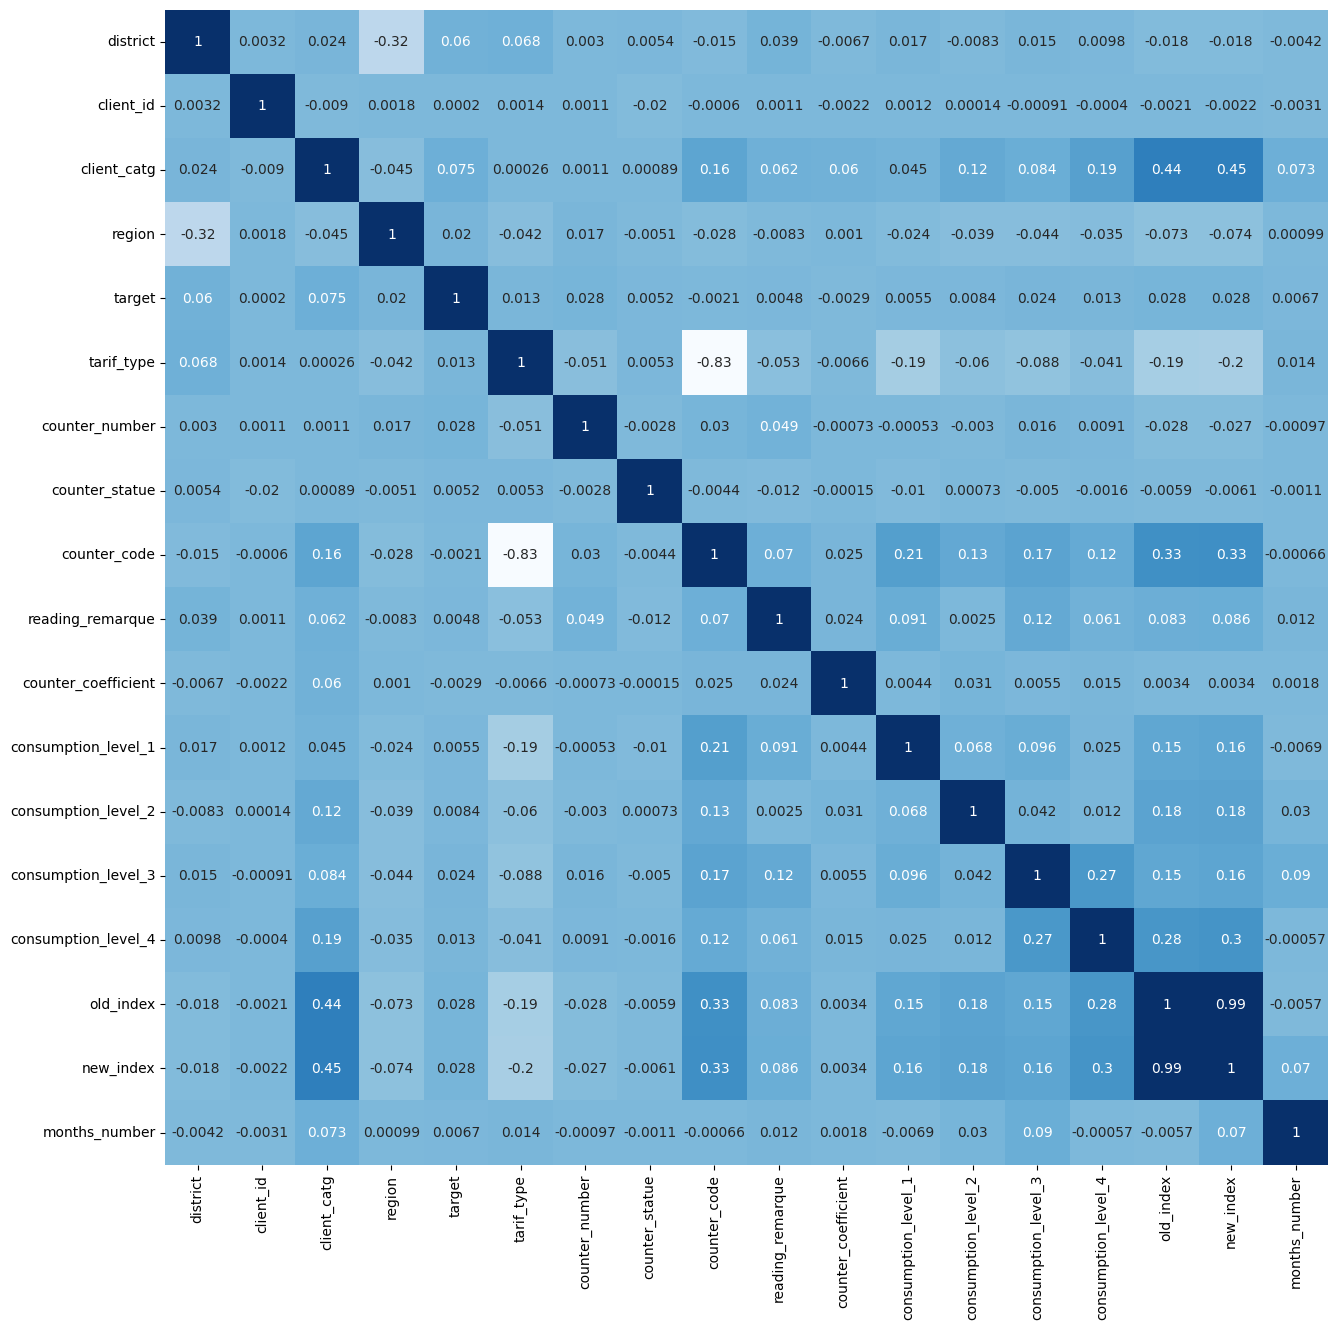

In [18]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df_data.corr(),cbar=False,annot=True,cmap='Blues')

In [19]:
# show the top 5 correlated columns
df_data.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:5]

district      district       1.000000
new_index     old_index      0.993678
counter_code  tarif_type     0.833181
new_index     client_catg    0.448193
client_catg   old_index      0.442107
dtype: float64

In [20]:
# show the correlation between the target column and the other columns
df_data.corr()['target'].sort_values(ascending=False)
# show the correlation between the counter_number column and the other columns
df_data.corr()['counter_number'].sort_values(ascending=False)

counter_number         1.000000
reading_remarque       0.048613
counter_code           0.030406
target                 0.028005
region                 0.017088
consumption_level_3    0.015873
consumption_level_4    0.009142
district               0.002977
client_id              0.001149
client_catg            0.001087
consumption_level_1   -0.000534
counter_coefficient   -0.000732
months_number         -0.000966
counter_statue        -0.002779
consumption_level_2   -0.003040
new_index             -0.027146
old_index             -0.027722
tarif_type            -0.050585
Name: counter_number, dtype: float64

In [21]:
# count the unique values in the column target
df_data['target'].value_counts()
# print the percentage of the target column in a readable format. add the % sign
print(f"0: {round(df_data['target'].value_counts()[0] / len(df_data) * 100, 2)}% of the target column are not frauds")
print(f"1: {round(df_data['target'].value_counts()[1] / len(df_data) * 100, 2)}% of the target column are frauds")

0: 92.11% of the target column are not frauds
1: 7.89% of the target column are frauds


In [22]:
# berechne das verhältnis der kategorien in target und client_catg gegeneinander in einer tabelle
pd.crosstab(df_data['target'], df_data['client_catg'], normalize='columns')*100

# show the number of target values for each client_catg
df_data.groupby('client_catg')['target'].value_counts()

client_catg  target
11           0         3977343
             1          327537
12           0           64134
             1            3795
51           0           82152
             1           21777
Name: target, dtype: int64

In [23]:
# berechne das verhältnis der kategorien in target und counter_type gegeneinander in einer tabelle
pd.crosstab(df_data['target'], df_data['counter_type'], normalize='columns')*100

counter_type,ELEC,GAZ
target,,
0,92.324961,91.643838
1,7.675039,8.356162


In [24]:
# berechne das verhältnis der kategorien in target und reading_remarque gegeneinander in einer tabelle
pd.crosstab(df_data['target'], df_data['reading_remarque'], normalize='columns')*100

reading_remarque,5,6,7,8,9,203,207,413
target,,,,,,,,
0,100.0,92.293117,99.848714,91.816554,91.99685,100.0,100.0,100.0
1,0.0,7.706883,0.151286,8.183446,8.00315,0.0,0.0,0.0


In [25]:
# show the sum of the values of reading_remarque for reading_remarque = 5, 203, 207, 413
df_data[df_data['reading_remarque'].isin([5, 7, 203, 207, 413])]['reading_remarque'].value_counts()

7      661
203     15
413     12
207      6
5        1
Name: reading_remarque, dtype: int64

# Some Plots

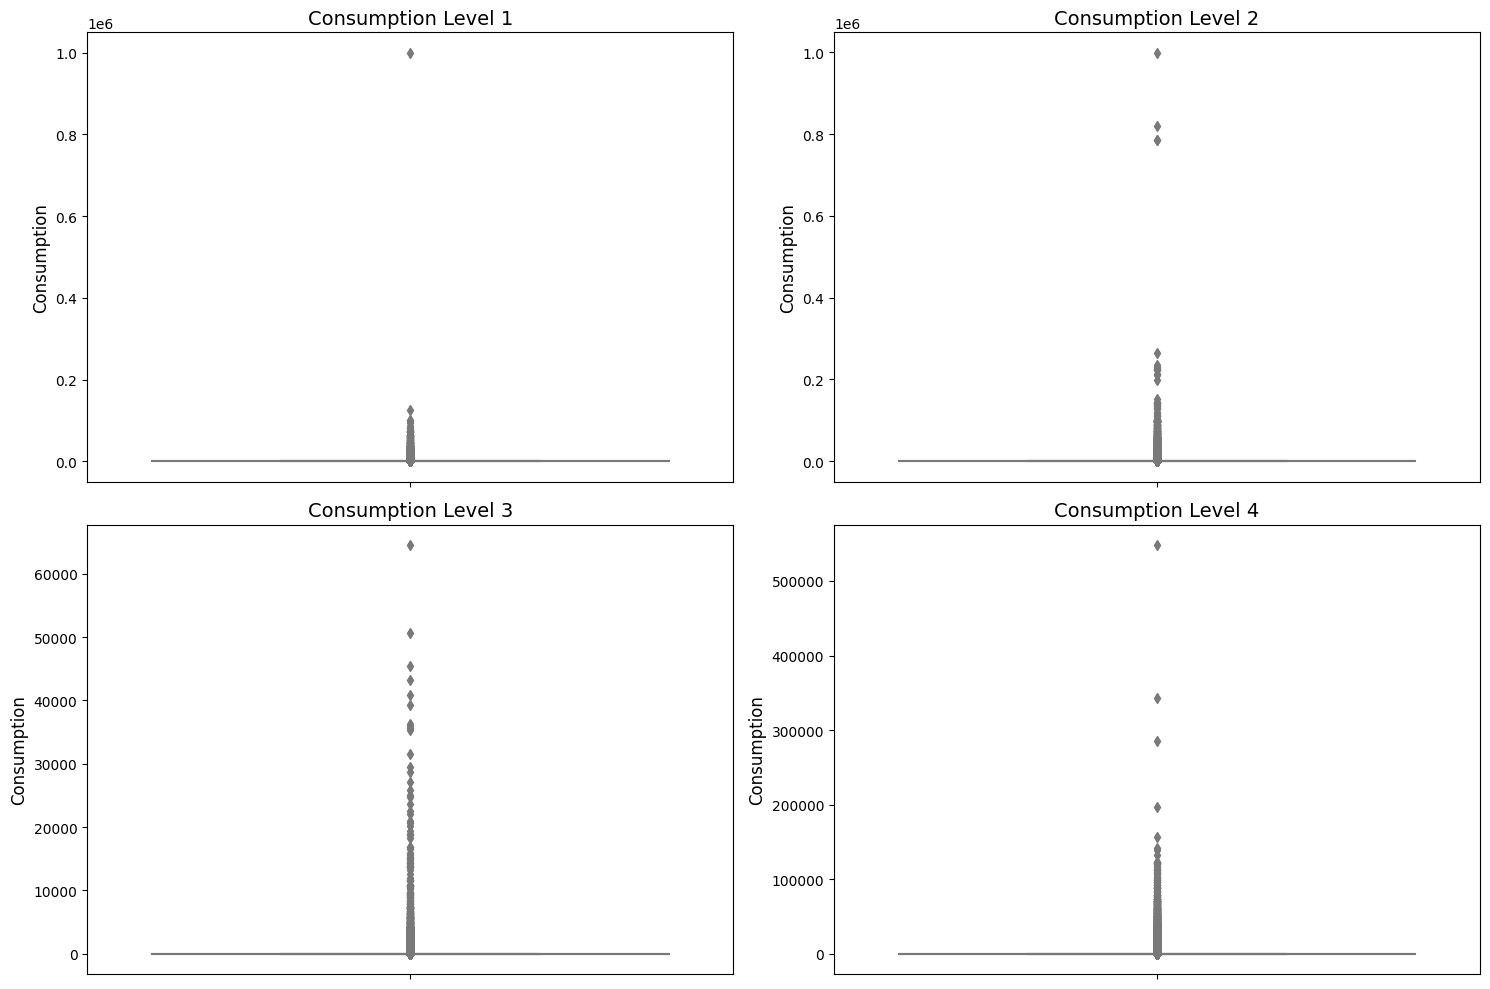

In [26]:
import matplotlib.pyplot as plt

# create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# create boxplots for each consumption level
sns.boxplot(ax=axes[0, 0], data=df_data, y='consumption_level_1', color='lightblue')
sns.boxplot(ax=axes[0, 1], data=df_data, y='consumption_level_2', color='lightblue')
sns.boxplot(ax=axes[1, 0], data=df_data, y='consumption_level_3', color='lightblue')
sns.boxplot(ax=axes[1, 1], data=df_data, y='consumption_level_4', color='lightblue')

# set titles and axis labels for each subplot
axes[0, 0].set_title('Consumption Level 1', fontsize=14)
axes[0, 0].set_ylabel('Consumption', fontsize=12)

axes[0, 1].set_title('Consumption Level 2', fontsize=14)
axes[0, 1].set_ylabel('Consumption', fontsize=12)

axes[1, 0].set_title('Consumption Level 3', fontsize=14)
axes[1, 0].set_ylabel('Consumption', fontsize=12)

axes[1, 1].set_title('Consumption Level 4', fontsize=14)
axes[1, 1].set_ylabel('Consumption', fontsize=12)

# adjust spacing between subplots
plt.tight_layout()

# show the figure
plt.show()

# Categorical data - district, client_catg, target, tarif_type, region

### Barplots

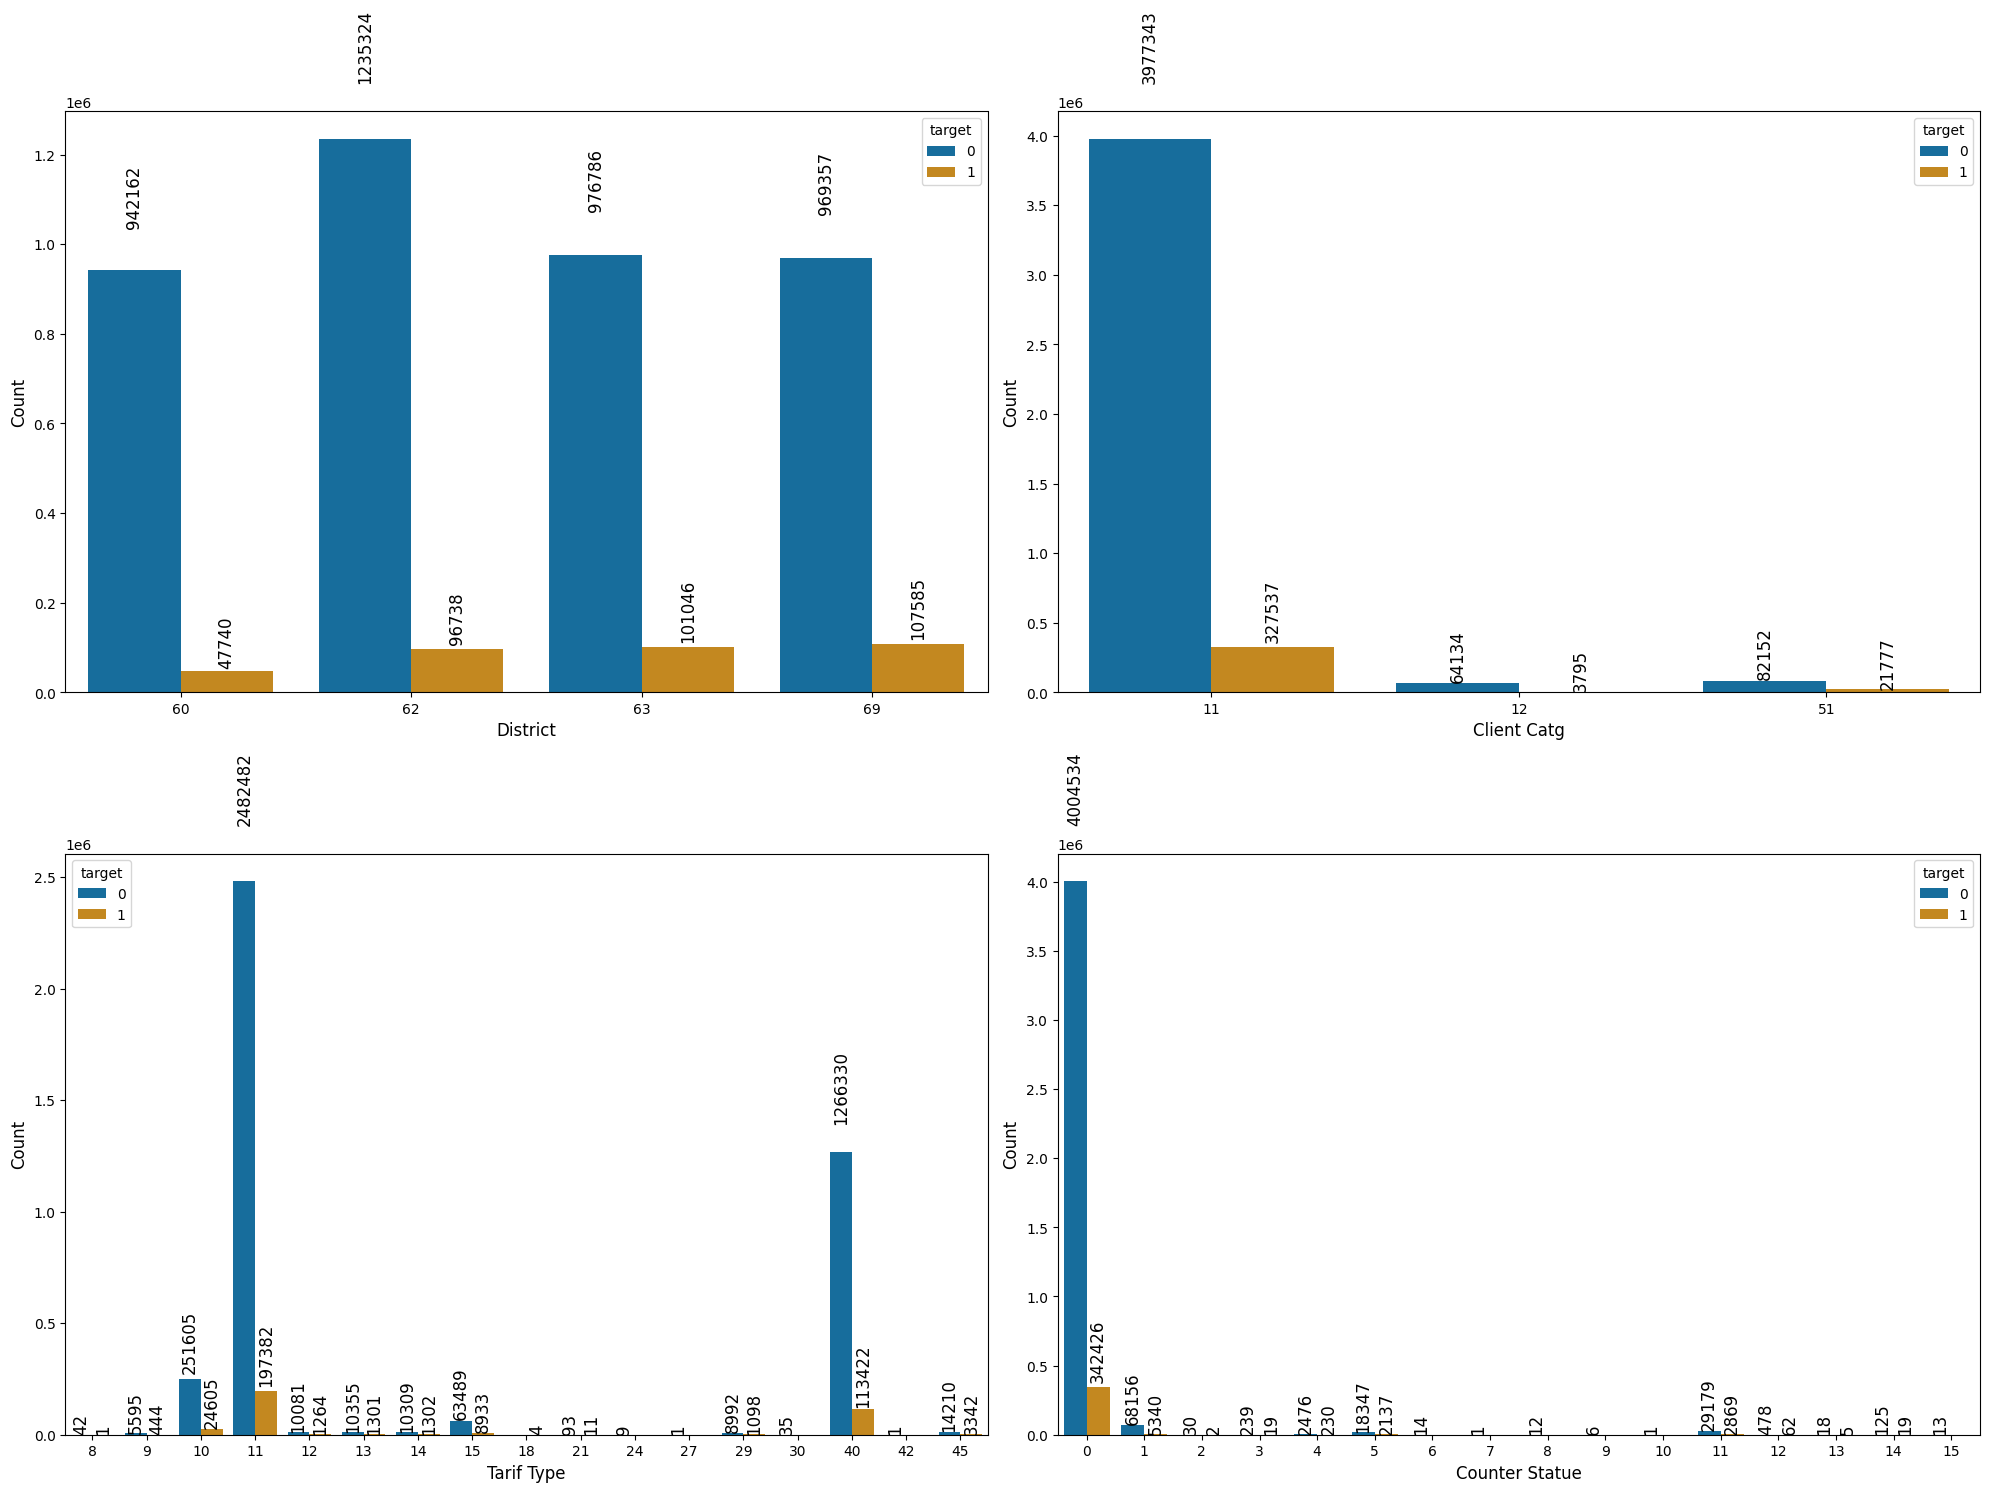

In [27]:
# code
# create figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# create category plots for each column and target
sns.countplot(ax=axes[0, 0], data=df_data, x='district', hue='target', palette='colorblind')
sns.countplot(ax=axes[0, 1], data=df_data, x='client_catg', hue='target', palette='colorblind')
sns.countplot(ax=axes[1, 0], data=df_data, x='tarif_type', hue='target', palette='colorblind')
sns.countplot(ax=axes[1, 1], data=df_data, x='counter_statue', hue='target', palette='colorblind')

# set y axis to logarithmic
#axes[0, 0].set_yscale('log')
#axes[0, 1].set_yscale('log')
#axes[1, 0].set_yscale('log')
#axes[1, 1].set_yscale('log')

# set titles and axis labels for each subplot
axes[0, 0].set_title('', fontsize=14)
axes[0, 0].set_xlabel('District', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# show the count value on top of each bar
for ax, col in zip(axes.flatten(), ['district', 'client_catg', 'tarif_type', 'counter_statue']):
    for container in ax.containers:
        # get the height of each bar in the container
        heights = [patch.get_height() for patch in container.patches]
        
        # add the count value text above each bar
        for patch, height in zip(container.patches, heights):
            posx = patch.get_x() + patch.get_width() / 2
            posy = height * 1.1
            if np.isfinite(posy):
                ax.text(posx, posy, f'{height:.0f}', ha='center', va='bottom', fontsize=12, rotation=90)

    # set axis labels
    ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# adjust spacing between subplots
plt.tight_layout()

# show the figure
plt.show()


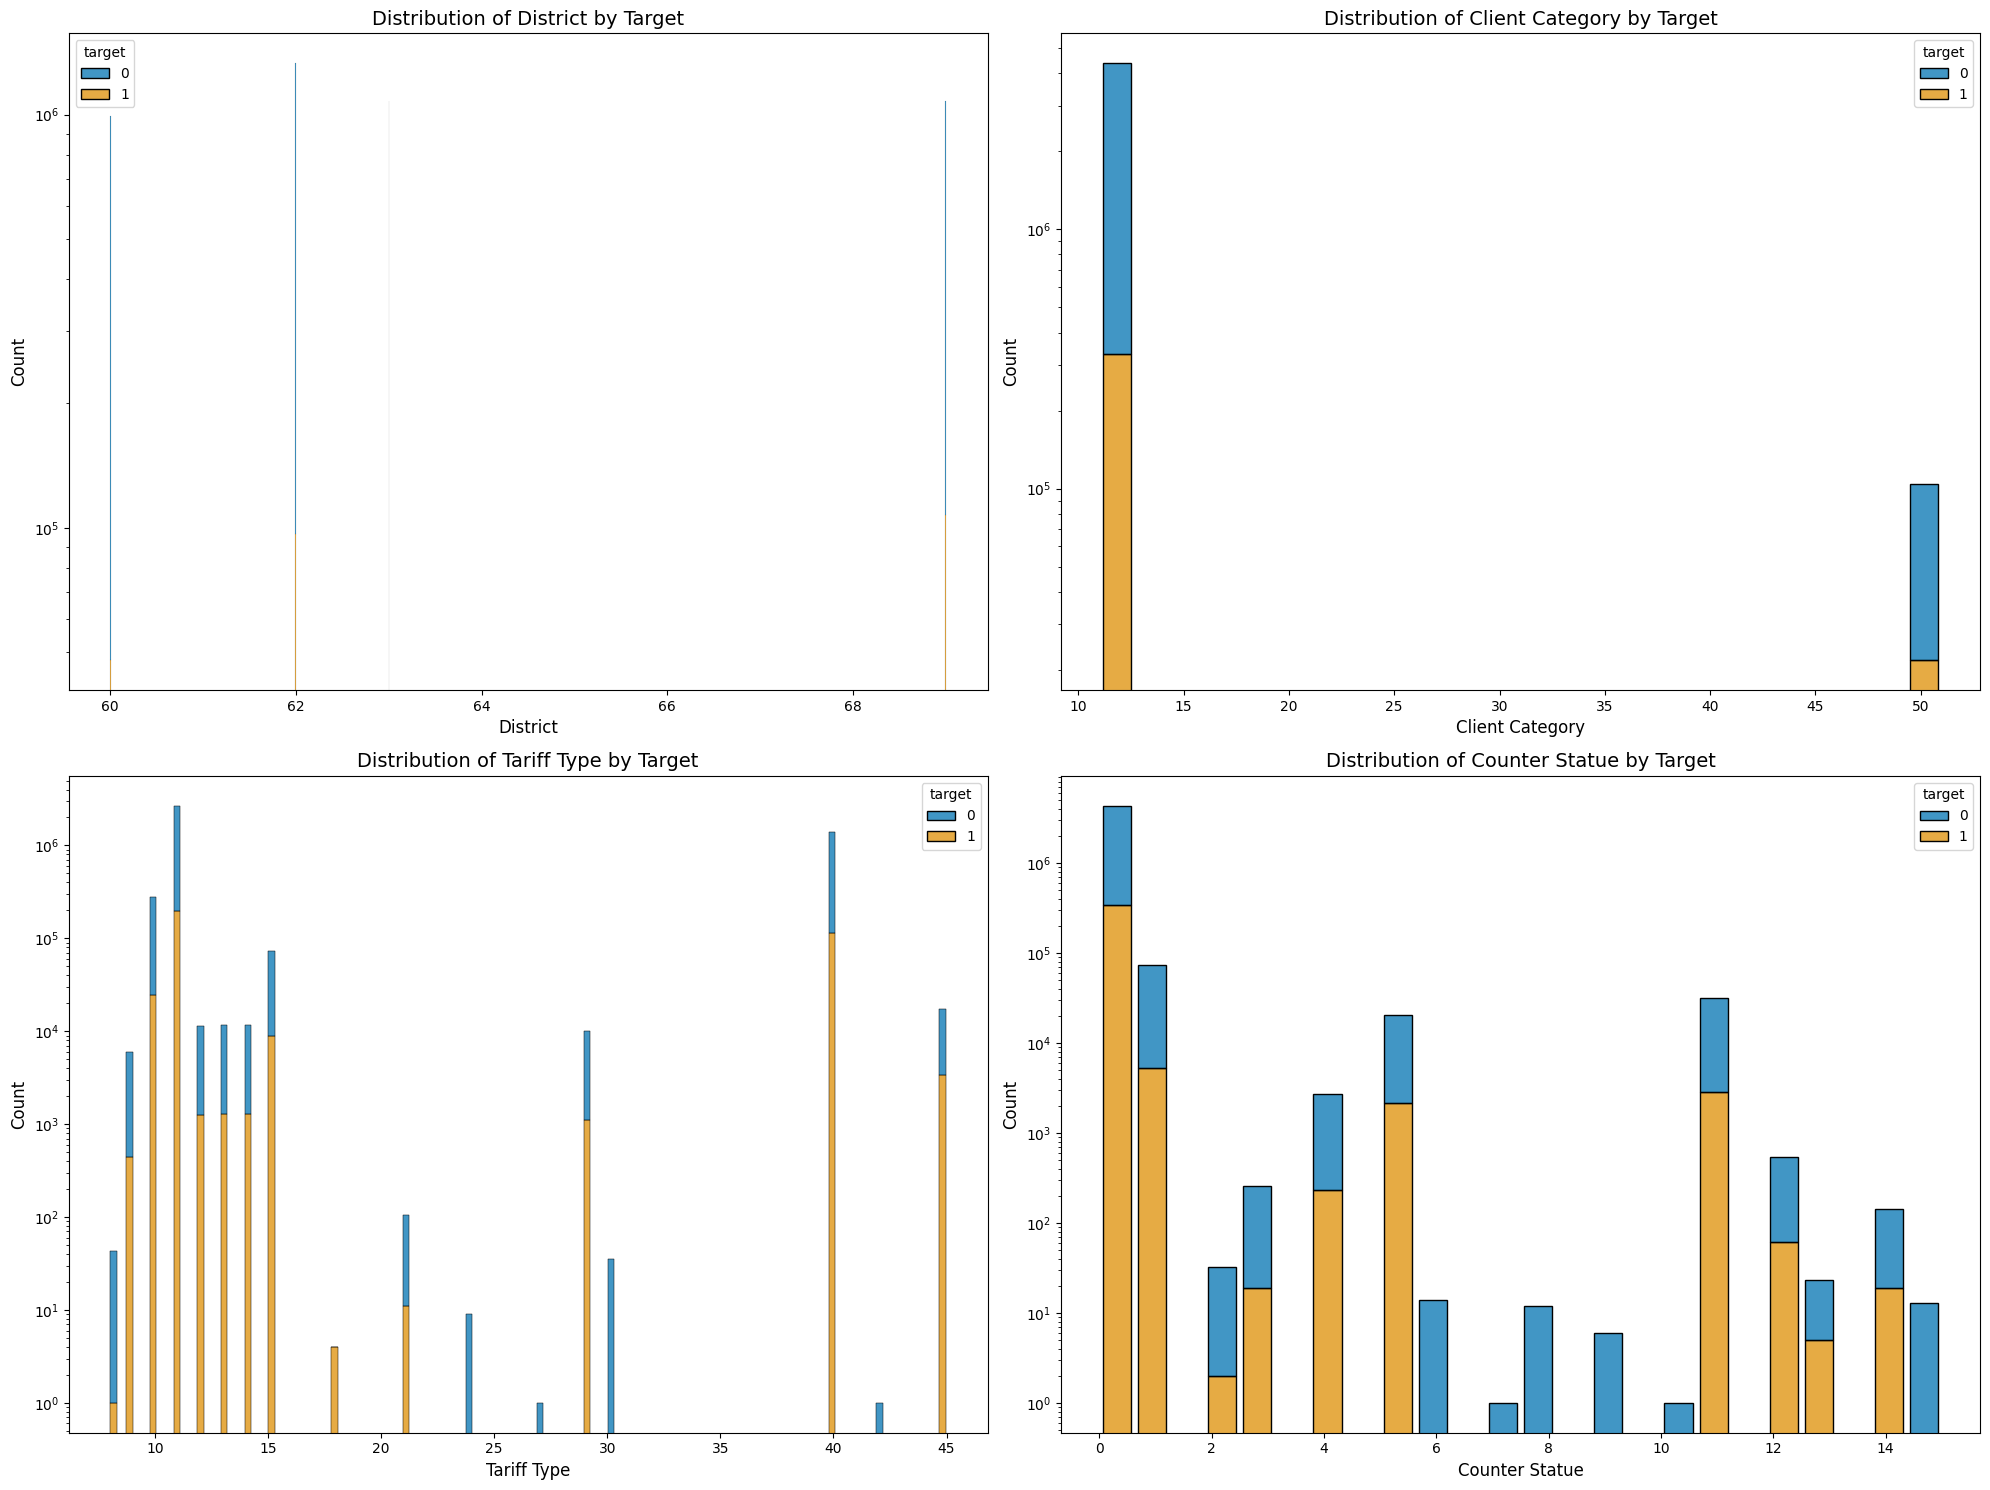

In [28]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

sns.histplot(ax=axes[0, 0], data=df_data, x='district', hue='target', multiple='stack', palette='colorblind', shrink=0.8)
sns.histplot(ax=axes[0, 1], data=df_data, x='client_catg', hue='target', multiple='stack', palette='colorblind', shrink=0.8)
sns.histplot(ax=axes[1, 0], data=df_data, x='tarif_type', hue='target', multiple='stack', palette='colorblind', shrink=0.8)
sns.histplot(ax=axes[1, 1], data=df_data, x='counter_statue', hue='target', multiple='stack', palette='colorblind', shrink=0.8)

# set y axis to logarithmic
axes[0, 0].set_yscale('log')
axes[0, 1].set_yscale('log')
axes[1, 0].set_yscale('log')
axes[1, 1].set_yscale('log')

# set titles and axis labels for each subplot
axes[0, 0].set_title('Distribution of District by Target', fontsize=14)
axes[0, 0].set_xlabel('District', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

axes[0, 1].set_title('Distribution of Client Category by Target', fontsize=14)
axes[0, 1].set_xlabel('Client Category', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

axes[1, 0].set_title('Distribution of Tariff Type by Target', fontsize=14)
axes[1, 0].set_xlabel('Tariff Type', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

axes[1, 1].set_title('Distribution of Counter Statue by Target', fontsize=14)
axes[1, 1].set_xlabel('Counter Statue', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# adjust spacing between subplots
plt.tight_layout()

# show the figure
plt.show()



# Baseline Model

In [29]:
# create a copy of df_data called df_data_features
df_data_features = df_data.copy()
# sum the consumption levels to get the total consumption
df_data_features['consumption'] = df_data_features['consumption_level_1'] + df_data_features['consumption_level_2'] + df_data_features['consumption_level_3'] + df_data_features['consumption_level_4']
# drop the consumption levels
df_data_features.drop(['consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4'], axis=1, inplace=True)
# drop the old_index and new_index columns
df_data_features.drop(['old_index', 'new_index'], axis=1, inplace=True)

In [30]:
df_data_features.head()

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,months_number,counter_type,consumption
0,60,0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,203,8,1,4,ELEC,82
1,60,0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,203,6,1,4,ELEC,1384
2,60,0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,203,8,1,4,ELEC,123
3,60,0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,207,8,1,4,ELEC,102
4,60,0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,207,9,1,12,ELEC,572


In [38]:
# create a new column "year" with the year of the invoice_date
df_data_features['year'] = df_data_features['invoice_date'].dt.year

# create a new column with the mean consumption per year
# group by client_id and year
mean_consumption_by_client_year = df_data_features.groupby(['client_id', 'year'])["consumption"].mean().reset_index()

mean_consumption_by_client_year.rename(columns={'consumption': 'Mean_total_consumption'}, inplace=True)

# Join the mean consumption DataFrame with the original DataFrame
merged_df = pd.merge(df_data_features, mean_consumption_by_client_year, on=['client_id', 'year'], how='left')

In [40]:
merged_df.head(20)

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,months_number,counter_type,consumption,year,Mean_total_consumption
0,60,0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,203,8,1,4,ELEC,82,2014,107.333333
1,60,0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,203,6,1,4,ELEC,1384,2013,523.000000
2,60,0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,203,8,1,4,ELEC,123,2015,147.333333
3,60,0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,207,8,1,4,ELEC,102,2015,147.333333
4,60,0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,207,9,1,12,ELEC,572,2016,572.000000
5,60,0,11,101,1994-12-31,0,2017-07-17,11,1335667,0,207,9,1,8,ELEC,314,2017,314.000000
6,60,0,11,101,1994-12-31,0,2018-12-07,11,1335667,0,207,9,1,12,ELEC,541,2018,541.000000
7,60,0,11,101,1994-12-31,0,2019-03-19,11,1335667,0,207,9,1,8,ELEC,585,2019,585.000000
8,60,0,11,101,1994-12-31,0,2011-07-22,11,1335667,0,203,9,1,4,ELEC,1386,2011,988.333333
9,60,0,11,101,1994-12-31,0,2011-11-22,11,1335667,0,203,6,1,4,ELEC,1082,2011,988.333333
